# Problem set 2: Counting words

## Description

The goal of this problem set is to create the world's least visually-sophisticated word count graphic.

Along the way, you'll experiment with stopword removal, case folding, and other processing steps.

## Count words, naïvely

We'll work with *Moby-Dick*, as we did in class. 

**Read the text of *Moby-Dick* from a file (it's on the class GitHub site, in the `data/texts` directory), tokenize it with NLTK's `word_tokenize` function, and count the resulting tokens in a `Counter` object.**

You can refer to the lecture notebook from Monday, September 7, to borrow code to do all of this. But you must get that code working in the cell below. This cell should produce a `Counter` object that holds the token counts from the novel.

In [2]:
# Use standard Python file commands to open Moby-Dick,
#  then count the words in that file.
import os 
from collections import Counter
from nltk import word_tokenize
moby_name= 'A-Melville-Moby_Dick-1851-M.txt'
moby_path= os.path.join('..','..','data','texts', moby_name)
print(moby_path)

../../data/texts/A-Melville-Moby_Dick-1851-M.txt


In [3]:
import nltk
nltk.download('punkt')

moby_simple_c= Counter()
with open(moby_path, 'r') as f: 
    for line in f:
        tokens = word_tokenize(line.strip())
        for token in tokens: 
            moby_simple_c[token] += 1

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/joshuahong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
moby_simple_c.most_common(5) 

[(',', 19204), ('the', 13715), ('.', 7432), ('of', 6513), ('and', 6010)]

**Print the total number of words (hint: use `Counter`'s `.values()` method, along with the `sum` function) in your text, as well as the 20 most frequently occurring terms and their counts.**

We'll do this a lot, so wrap it up as a function that takes as input a `Counter` object and an optional number of top terms to print:

```
def word_stats(data, n=20):
```

The output of your fuction should look like this:

```
Total words in the text: 255380

Top 20 words by frequency:
,      19204
the    13715
.      7432

[and so on ...]
```

In [5]:
# Your word_stats function here
def word_stats(data, n=20):
    '''
    Print total wordcount and n top terms.
    Takes a Counter object and a number of terms to print.
    Returns None.
    '''
    total = sum(data.values())
    print('Total Tokens:', total)
    
    print('\nMost common tokens:')
    for word in data.most_common(n):
        print(word[0], '\t', word[1])
    return None

In [6]:
# Call word_stats on your data
word_stats(moby_simple_c)

Total Tokens: 255380

Most common tokens:
, 	 19204
the 	 13715
. 	 7432
of 	 6513
and 	 6010
a 	 4546
to 	 4515
; 	 4173
in 	 3909
that 	 2981
his 	 2459
it 	 2205
I 	 2121
! 	 1767
's 	 1731
is 	 1722
-- 	 1714
he 	 1660
with 	 1659
was 	 1640


## Case folding and stopwords

As you can see, the top words that we counted aren't super informative. That said, list two things that you **can** say about the text with reasonable confidence on the basis of our results above:

**Two things you *can* tell about *Moby-Dick* from the naïve word counts:**

1. Moby Dick's most used *words* are stop words
2. Punctuation is counted to be the most used token

If we want our word list to be informative, we need to find a way to ignore high-frequency, low-information words. We can do this either by not counting them in the first place, or by excluding them from our reporting after we've collected them. Both methods have advantages and drawbacks. The one you pursue is up to you.

**Modify the original code to ignore token case (e.g., 'The' and 'the' are both counted as occurrences of the same token; note the `.lower()` method for strings) and to remove the English-language stopwords defined by NLTK (`from nltk.corpus import stopwords`). Then display the total token count and top-20 tokens.**

In [7]:
# Count tokens with case folding and NLTK English stopwords removed

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) #set stopwords code off stack overflow

moby_simple_c= Counter()
with open(moby_path, 'r') as f: 
    for line in f:
        tokens = word_tokenize(line.strip())
        for token in tokens: 
            token = token.lower()
            if not token in stop_words:
                moby_simple_c[token] += 1

word_stats(moby_simple_c)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joshuahong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total Tokens: 150080

Most common tokens:
, 	 19204
. 	 7432
; 	 4173
's 	 1787
! 	 1767
-- 	 1714
'' 	 1565
`` 	 1529
whale 	 1096
? 	 1004
one 	 913
like 	 580
upon 	 565
ahab 	 511
man 	 498
ship 	 469
old 	 443
ye 	 439
would 	 436
sea 	 384


Is this better? Maybe! **Note one advantage of this stopword-removed count, as well as one disadvantage:**

**Advantage:**

* We are getting more words that aren't stop words and we can see, possibly, the type of book this is without even having to read it. We also get to understand what is really the important tokens to look at. 

**Disadvantage:**

* A disadvantange might be that we are unable to see all of the tokens that should be included and might be leaving out important tokens

Let's see if we can further improve/refine our approach to continue narrowing our word list. Our goal is to produce a list that contains *only* interesting words and ranks them by frequency.

**List at least two ideas for modifying the stopword list to better approach our goal:**

1. Personally, I do not think commas or periods or semicolons tell much of the story, unlike other punctuation, so I would get rid of those. I believe that these punctuations do not give any additional information or context for the story. 
2. I would also like to see elimination of shortened words, such as 's. I think n't gives more context than 's so, other than n't I would like to see stopwords try to modify its list by better identifying stop words that have been shortened. 
3. Also just as a side note, I got rid of the '--' because I do not think it really adds anything, but I did keep in the quotation marks and stylized quotation marks since they give context to the reading. 

**Implement one or more of your ideas to improve the stopword list, then display the output of your new version using `word_stats()`.**

In [8]:
# Better stopwords in action!

lst = [',','.',';','\'s', '--']
for i in lst: 
    stop_words.add(i)

moby_simple_c= Counter()
with open(moby_path, 'r') as f: 
    for line in f:
        tokens = word_tokenize(line.strip())
        for token in tokens: 
            token = token.lower()
            if not token in stop_words:
                moby_simple_c[token] += 1

word_stats(moby_simple_c)

Total Tokens: 115770

Most common tokens:
! 	 1767
'' 	 1565
`` 	 1529
whale 	 1096
? 	 1004
one 	 913
like 	 580
upon 	 565
ahab 	 511
man 	 498
ship 	 469
old 	 443
ye 	 439
would 	 436
sea 	 384
though 	 383
yet 	 344
time 	 326
captain 	 325
long 	 318


Refine your stoplist until you're satisfied with it. Make sure your code above displays the final output of your `word_stats` function. Then move on.

# Visualization 

Now, make the world's least visually-impressive word count graphic. Your task is to produce a visual representation of your top 10 words that shows the relative frquency of those terms.

The simplest acceptable version of this visualization is a bar chart. **Complete the starter code below to produce a bar chart of the top ten words in the text.**

Your output might look like this:

![bar chart](ps_02_bar_chart.png)

In [9]:
def words(d, n=10):

    total = sum(d.values())
    print('Total Tokens:', total)
    
    print('\nMost common tokens:')
    for word in d.most_common(n):
        print(word[0], '\t', word[1])
        
    return None

In [10]:
lst = [',','.',';','\'s', '--', '``', '\'\'', '!', '?']
for i in lst: 
    stop_words.add(i)

moby_simple= Counter()
with open(moby_path, 'r') as f: 
    for line in f:
        tokens = word_tokenize(line.strip())
        for token in tokens: 
            token = token.lower()
            if not token in stop_words:
                moby_simple[token] += 1
words(moby_simple)

Total Tokens: 109905

Most common tokens:
whale 	 1096
one 	 913
like 	 580
upon 	 565
ahab 	 511
man 	 498
ship 	 469
old 	 443
ye 	 439
would 	 436


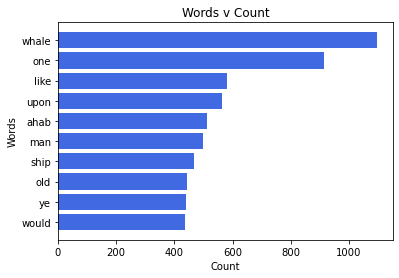

In [11]:
# Make a bar chart of the top 10 words
%matplotlib inline
import matplotlib.pyplot as plt

moby_chart = moby_simple.most_common(10)
x = []
for i in moby_chart: 
    x.append(i[0])
y = []
for i in moby_chart: 
    y.append(i[1])
# Get labels and counts
labels = x
counts = y

# Create the figure
fig, ax = plt.subplots()
ax.barh(x, y, color='royalblue') #like the ocean
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Words')
ax.set_title('Words v Count')

plt.show()

## Optional: word clouds

**This is optional.** Make a word cloud. You can do this the ugly way in pure `matplotlib` or the easy-and-pretty way by using the [`wordcloud`](https://github.com/amueller/word_cloud) library:

```
conda install -c conda-forge wordcloud
```
If you use `wordcloud`, you'll be interested in the [`.generate_from_frequencies()` method](http://amueller.github.io/word_cloud/auto_examples/frequency.html).

Here are examples of the ugly and the pretty outputs. Your specific results might vary.

![ugly](ps_02_ugly_cloud.png)
![pretty](ps_02_pretty_cloud.png)

In [12]:
# The ugly way (matplotlib)
# Hint: you'll want to use the .text() plotting method
# Strictly optional

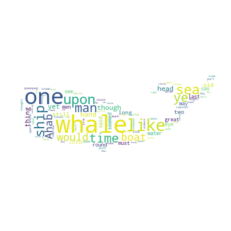

In [17]:
# The pretty way
# Strictly optional

#code from link posted
import numpy as np
import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

whale = np.array(Image.open(path.join("moby-dick-stencil.png"))) #image from online, https://www.pinterest.com/pin/2111131054358686/
moby_dick = open(moby_path).read()

wc = WordCloud(background_color="white", max_words=100, mask=whale,
               stopwords=stop_words)

wc.generate(moby_dick)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

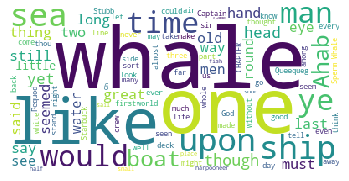

In [27]:
wc = WordCloud(background_color="white", max_words=100,
               stopwords=stop_words)

wc.generate(moby_dick)
plt.imshow(wc, interpolation='nearest')
plt.axis("off")
plt.show()